<a href="https://colab.research.google.com/github/samp3209/wineproject/blob/main/wine_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('wine - wine.csv')

In [2]:
df.head(100)

,wine_names,year,price,region,country
0,1911 Moet & Chandon Vintage Champagne 750ml,1911.0,6995.00,champagne,france
1,"2021 , Weingut Wittmann , Aulerde Riesling Gro...",2021.0,349.99,Rheinhessen,germany
2,Dom Perignon Rose x Lady Gaga 2022 Limited Edi...,2022.0,449.99,champagne,france
3,2022 Egon Muller Wiltinger Braune Kupp Rieslin...,2022.0,398.39,masel,germany
4,"Fiano di Avellino DOCG 2022, Feudi di San Greg...",2022.0,13.04,campania,italy
...,...,...,...,...,...
95,Occhipinti - SP 68 Rosso 2021,2021.0,34.99,sicily,italy
96,Occhipinti - SP 68 Rosso 2021,2021.0,34.99,sicily,italy
97,HUET VOUVRAY SEC LE HAUT-LIEU 2021 750 ML,2021.0,33.99,loire,france
98,Domaine Huet - Vouvray Sec Haut-Lieu 2021 (750ml),2021.0,33.75,loire,france


In [3]:
df = df.sort_values('price', ascending=True)

In [4]:
df['price'] = df['price'].astype('float')

In [5]:
import plotly.express as px

fig = px.scatter(df, x="year", y="price", color="country", hover_name="wine_names", 
                 title="Wine Prices over Time")
fig.update_layout(yaxis_range=[0, 3500]) # set the y-axis range to remove outliers
fig.update_layout(xaxis_range=[1990, 2025]) # set the y-axis range to remove outliers

fig.show()

In [ ]:
df.dtypes

wine_names     object
year          float64
price          object
region         object
country        object
dtype: object

In [ ]:
fig = px.box(df, x="country", y="price", title="Wine Prices by Country")
fig.update_layout(yaxis_range=[0, 3500]) # set the y-axis range to remove outliers
fig.show()

<Axes: >

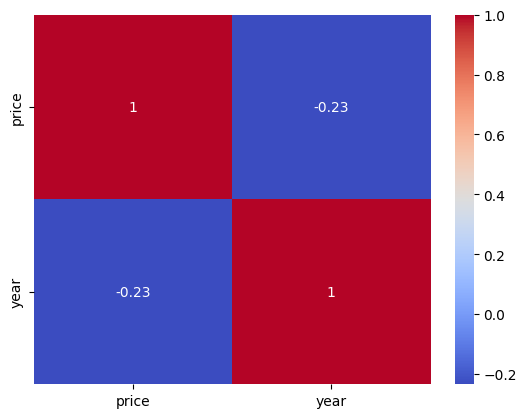

In [6]:
import seaborn as sns

# select the relevant columns and filter the data based on the y and x axis ranges
subset_df = df[(df['price'] < 3500) & (df['year'] >= 1990) & (df['year'] <= 2025)]
subset_df = subset_df[['price', 'year', 'region', 'country']]

# create a correlation matrix
corr_matrix = subset_df.corr()

# create a heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [7]:

# group the data by country and calculate summary statistics for price and year
country_stats = df.groupby('country').agg({'price': ['mean', 'min', 'max', 'std']})

# display the summary statistics for each country
print(country_stats)

                price                              
                 mean    min       max          std
country                                            
cali       691.465209  30.00  13000.00  1292.611615
france    1550.144722  12.95  59070.80  3998.325493
germany    752.822559   8.00  39347.76  2158.170786
italy      356.715094   5.00  18000.00   813.752746
port       289.274828   4.16   7367.23   710.517422
portugal   204.341233   5.48    702.65   179.450620


In [9]:
subsetcountry_stats = subset_df.groupby('country').agg({'price': ['mean', 'min', 'max', 'std']})
subsetcountry_stats

price                            
                mean    min      max         std
country                                         
cali      466.746181  30.00  3480.00  669.451643
france    663.120631  12.95  3499.00  759.590954
germany   445.245732   8.00  3487.92  562.633916
italy     289.985419   5.00  3210.00  543.397733
port      207.657374   4.16  2439.79  293.087132
portugal  207.989015   5.48   702.65  184.068358

In [10]:
# group by year and calculate average price
df_year = df.groupby('year').mean().reset_index()

# create line plot using Plotly Express
fig = px.line(df_year, x='year', y='price', title='Average Wine Price by Year')
fig.show()

In [12]:
# group by year and calculate average price
df_year = df.groupby('year').median().reset_index()

# create line plot using Plotly Express
fig = px.line(df_year, x='year', y='price', title='Median Wine Price by Year')
fig.show()

In [16]:
df['wine_names'].sample(20)

128                            Terre Nere Etna Rosso 2021
5666                    2012 A. Rousseau Chambertin 750ml
8498             Domaine de Baumard Quarts de Chaume 1967
5308    Beaucastel, Chateauneuf Du Pape Hommage J Perr...
1296    2020 Weingut Egon Muller Wiltinger Braune Kupp...
4588    Chateau Des Tours Cotes du Rhone Rouge 2015 75...
684     Feudi di San Gregorio Greco di Tufo 2020, Camp...
599     Clemens Busch, Riesling Grosses Gewachs Fahrla...
7182    Dom Perignon Rose 2005 6 pack [Provenance Guar...
7577    [Lot 2471998], Quinta do Noval Vintage Porto N...
3191    Chateau La Mission Haut-Brion Cru Classe de Gr...
6938    Taylor, Taylor`s Late Bottled Vintage 2008, Po...
3851    Chateau Montelena Estate Cabernet Sauvignon 20...
3975         Florsheim Frauenberg GG Spatburgunder Keller
2887    2018 Domaine Pascal Cotat Sancerre Les Monts D...
8778    Armand Rousseau Chambertin Clos de Beze Burgun...
4755    [Lot n° 1218], 6 Bouteilles SANCERRE "LA GRAND...
9044      [lot

In [20]:
import re
regexes = {
    '1\.5 l': r'1\.5[ -]?l',
    'magnum': r'magnum',
    'double magnum': r'double[ -]?magnum|dmagnum',
    '3 l': r'3[ -]?l',
    '375 ml': r'375[ -]?ml',
    '.75 liter': r'\.75[ -]?l(iter)?|\.75[ -]?cl',
    '3-bottle': r'3[ -]?bottle',
    '2-bottle': r'2[ -]?bottle',
    '1.0l': r'1\.0[ -]?l',
    '6-bottle': r'6[ -]?bottle',
    '12-bottle': r'12[ -]?bottle',
    '1,5l': r'1,[ -]?5[ -]?l',
    '1l': r'1[ -]?l(iter)?|1[ -]?liter',
    '2 bottles': r'2[ -]?bottles?',
    '3 bottles': r'3[ -]?bottles?',
    '6 bottles': r'6[ -]?bottles?',
    'case of 3': r'case[ -]?of[ -]?3',
    'case of 2': r'case[ -]?of[ -]?2',
    'case of 6': r'case[ -]?of[ -]?6',
    'case of 12': r'case[ -]?of[ -]?12',
    'pack of 2': r'pack[ -]?of[ -]?2',
    'pack of 3': r'pack[ -]?of[ -]?3',
    'pack of 4': r'pack[ -]?of[ -]?4',
    'pack of 6': r'pack[ -]?of[ -]?6',
    'pack of 8': r'pack[ -]?of[ -]?8',
    'pack of 12': r'pack[ -]?of[ -]?12'
}

# define function to extract quantity/size from wine_names column
def get_quantity_size(wine_name):
    for size, regex in regexes.items():
        if re.search(regex, wine_name.lower()):
            return size
    return '750 ml'  # default to 750 ml if no size is found

# create new column for quantities/sizes
df['quantity_size'] = df['wine_names'].apply(get_quantity_size)

# check results
print(df['quantity_size'].head(100))


5          750 ml
9054    .75 liter
3662       750 ml
8667           1l
7853       750 ml
          ...    
37         750 ml
1944       750 ml
6620       750 ml
1943       750 ml
60         750 ml
Name: quantity_size, Length: 100, dtype: object


In [21]:
df.to_csv('wineql.csv')

In [22]:
import pandas as pd
import re

# read in the wine dataframe
df = pd.read_csv('wine_data.csv')

# create a new column to store the size/quantity
df['size'] = '750 ml'  # assume default size is 750 ml

# define regular expressions to match different sizes/quantities
patterns = [
    r'(\d+\.?\d*)\s*l',  # e.g. 1.5l, 0.75 l
    r'(\d+\.?\d*)\s*ml',  # e.g. 375ml, 500ml
    r'(\d+)\s*cl',  # e.g. 75cl
    r'(\d+)\s*-?\s*bottle',  # e.g. 2-bottle, 6 bottles
    r'case\s*of\s*(\d+)',  # e.g. case of 6
    r'pack\s*of\s*(\d+)'  # e.g. pack of 12
]

# iterate over patterns and extract size/quantity from wine_names
for pattern in patterns:
    df['size'] = df['wine_names'].str.extract(pattern, flags=re.IGNORECASE).fillna(df['size'])

# map size/quantity values to standardized sizes
size_map = {
    '0.75': '750 ml',
    '1': '1 L',
    '1.5': 'Magnum',
    '3': 'Double Magnum',
    '6': 'Imperial',
    '12': 'Salmanazar'
}
df['size'] = df['size'].apply(lambda x: size_map.get(str(x), x))

# convert size/quantity column to categorical dtype
df['size'] = pd.Categorical(df['size'], categories=['750 ml', 'Magnum', 'Double Magnum', 'Imperial', 'Salmanazar'])

# print the first few rows to check the results
print(df.head())

FileNotFoundError: ignored